<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>



Cree una copia de este Notebook en su Drive y desarrolle el taller sobre ese documento copia. Para crear la copia debe dar click en el botón **Copiar en Drive** ubicado en el panel superior, se abrirá un nuevo notebook que podrá manipular a su antojo y que se almacenará en su Drive dentro de la Carpeta *Colab Notebooks*.

# **Predicción del precio de hospedajes en Airbnb para la ciudad de Nueva York**

**Contexto:** Airbnb es una empresa que ofrece una plataforma de software dedicada a la oferta de alojamientos particulares y turísticos mediante la cual los anfitriones pueden publicitar y contratar el arriendo de sus propiedades con sus huéspedes; anfitriones y huéspedes pueden valorarse mutuamente, como referencia para futuros usuarios. Muchos nuevos anfitriones no cuentan con información global de tendencias del mercado por lo que sus precios no son óptimos. Airbnb gana una comisión por cada arrendamiento, por lo tanto, está interesado en que sus anfitriones cobren una tarifa óptima de acuerdo a las características del hospedaje. Si los anfitriones ganan más… Airbnb también.

**Problema de Negocio:** La empresa Airbnb lo ha contratado para desarrollar un modelo que permita responder la siguiente pregunta: ¿Cuál es la variable o característica más relevante para determinar el precio de un hospedaje en Airbnb? Y además que permita predecir el precio de un hospedaje dadas ciertas características del mismo.

**Sistema de información:** El conjunto de datos objetivo posee información acerca de 30.000 hospedajes de la plataforma Airbnb en la ciudad de Nueva York. Los datos a usar son datos públicos creados por Inside Airbnb, para más información puede consultar [aquí]( http://insideairbnb.com/get-the-data/).


## Indicaciones para resolver el Taller

El objetivo de este taller es que cree varios modelos que permitan predecir el precio de un hospedaje dadas ciertas características del mismo, además de responder algunas preguntas de negocio. Para ello tendrá que programar, investigar y analizar todos los resultados que vaya obteniendo. Tenga en cuenta las siguientes indicaciones:

* Añada comentarios al código para que documente sus soluciones. 
* Coloque su análisis en una celda de Texto luego de cada resultado.
* Para resolver un ejercicio puede usar tantas celdas de Código o Texto como requiera.

Si se le presenta un error de código o duda. Siga los siguientes pasos:
1. Lea y entienda el error, para ello puede buscar en la documentación de la librería o googlearlo
2. Intente resolverlo
3. Comuníquese con el expero temático usando el Foro, recuerde enviar un pantallazo del error y mencionar que Ejercicio está solucionando. **Abstengase de compartir el link de su Notebook en el Foro.**



A continuación, se listan algunos recursos que pueden ser valiosos para su análisis.
* En esta página puede encontrar las gráficas que se pueden construir dependiendo de las variables disponibles, una breve explicación de cada gráfica y código para construir cada visualización. https://www.data-to-viz.com/
* Documentación de Pandas. https://pandas.pydata.org/docs/index.html
* Documentación de Seaborn. https://seaborn.pydata.org/index.html
* Documentación de Scikit-learn. https://scikit-learn.org/stable/

##**0)-Librerías necesrias para el proyecto**

A continuación vamos a cargar las librerías necesarias para el desarrollo de este caso.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
sns.set()

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn',sns.__version__)
print('Scikit-learn',sklearn.__version__)

Python 3.10.11
NumPy 1.22.4
Pandas 1.5.3
Matplotlib 3.7.1
Seaborn 0.12.2
Scikit-learn 1.2.2


Este caso fue creado con las siguientes versiones:

```
Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2
Scikit-learn 1.0.2
```

##**1)-Etapas de la Fase de modelamiento**

Antes de comenzar, debemos revisar el cumplimiento de algunas condiciones y los pasos a seguir durante esta fase.

**Condiciones iniciales:**
1. Se hizo una fase de exploración prevía en la cuál se encontraron relaciones importantes, se encontraron errores o problemas que debían ser corregidos.
2. Se hizo la limpieza de valores faltantes, atípicos y además la transformación de las variables cualitativas.
**Pasos en la fase de modelamiento**
3. Se tiene una clara variable objetivo, y se ha definido cual es el problema a resolver.
4. Definir los algoritmos de trabajo.
5. Entrenar modelos, optimizarlos y evaluar su desempeño
6. Extraer valor de los modelos construidos

**Análisis de nuestra situación**

En las fases previas nos hemos encargado de los dos primeros pasos.  Tenemos una clara variable objetivo, el precio por noche de nuestros hospedajes en la ciudad de Nueva York, al tratarse de una variable cuantitativa estaremos resolviendo un **problema de regresión**. Como modelos preliminares estaremos empleando los algoritmos de Vecinos más Cercanos y Árbol de Decisión. Para la evaluación de modelos emplearemos el error cuadrático medio. En la siguiente fase realizaremos dos modelos más complejos usando Redes Neuronales y Bosque Aleatorio.

A continuación se listan las tareas que realizaremos en esta Fase:
1. Exploración rápida del conjunto de datos
2. Partición de prueba y entrenamiento
3. Entrenamiento y optimización de un modelo usando Vecinos más Cercanos
4. Entrenamiento y optimización de un modelo usando Árboles de Decisión.
5. Aprovechamiento del árbol
6. Comparación de los modelos obtenidos
7. Conclusiones 

##**2)-Exploración y Tratamiento del dataset**

###2.1-Exploración del dataset

Para empezar, cargamos el archivo que contiene la base de datos a emplear producto de la fase de Limpieza y Transformación. Un conjunto de datos sin datos atípicos, valores faltantes y con las transformaciones necesarias.

In [ ]:
airbnb = pd.read_csv('https://raw.githubusercontent.com/HarryVargas96/UdeCataluna/main/data/aibnb_limpio_sinnas_sincat.csv')
airbnb.head()

,price,neighbourhood,latitude,longitude,property_type,bathrooms,bedrooms,beds,host_is_superhost,parking,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,18.0,40.64749,-73.97237,1.0,1.0,1,1,0.0,1.0,0,1,0
1,150,80.0,40.80902,-73.94190,1.0,1.0,1,1,0.0,0.0,0,1,0
2,190,80.0,40.79685,-73.94872,1.0,1.0,2,2,0.0,0.0,1,0,0
3,60,18.0,40.65599,-73.97519,12.0,1.0,1,1,1.0,1.0,0,1,0
4,80,101.0,40.86754,-73.92639,1.0,1.0,1,1,0.0,1.0,0,1,0


Revisamos la infrmación básica del dataset como sus dimensiones e informaciones básicas del dataframe.

In [ ]:
# Dimensiones del dataframe
airbnb.shape

(30173, 13)

In [ ]:
# Resumen de las variables del dataframe
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30173 entries, 0 to 30172
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      30173 non-null  int64  
 1   neighbourhood              30173 non-null  float64
 2   latitude                   30173 non-null  float64
 3   longitude                  30173 non-null  float64
 4   property_type              30173 non-null  float64
 5   bathrooms                  30173 non-null  float64
 6   bedrooms                   30173 non-null  int64  
 7   beds                       30173 non-null  int64  
 8   host_is_superhost          30173 non-null  float64
 9   parking                    30173 non-null  float64
 10  room_type_Entire home/apt  30173 non-null  int64  
 11  room_type_Private room     30173 non-null  int64  
 12  room_type_Shared room      30173 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 3.0 MB


Revisamos la existencia de valores nulos. En este caso, el data set es carente de valores nulos.

In [ ]:
# El dataset de trabajo no contiene ningún valor nulo
airbnb.isnull().sum()

price                        0
neighbourhood                0
latitude                     0
longitude                    0
property_type                0
bathrooms                    0
bedrooms                     0
beds                         0
host_is_superhost            0
parking                      0
room_type_Entire home/apt    0
room_type_Private room       0
room_type_Shared room        0
dtype: int64

###2.2-Partición del dataset

Para nuestra fase de modelamiento, procedemos después de asegurarnos de la calidad de los datos a particionar el dataset en los conjuntos de entrenamiento y test. Ésto quiere decir que la data generada acontinuación será empleada para procesos de aprendizaje supervizado donde la partición se efectuará de manera tal que un 70% de las variables de entrada y objetivo corresponderán a la data de entrenamiento mientras que el 30% restante se empleará como la data de testeo. 

In [ ]:
from sklearn.model_selection import train_test_split

# Definimos las variables de entrada como X y la variable objetivo como y
X = airbnb.drop("price", axis=1)
y = airbnb["price"]

# Definimos la partición bajo un 30% de datos usados como test
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.3,
                                                    random_state = 8)

# Observamos las dimensiones
print("Dimensiones de X de entrenamiento {}:".format(X_train.shape))
print("Dimensiones de y de entrenamiento {}:".format(y_train.shape))

print("Dimensiones de X de test {}:".format(X_test.shape))
print("Dimensiones de y de yesy {}:".format(y_test.shape))

Dimensiones de X de entrenamiento (21121, 12):
Dimensiones de y de entrenamiento (21121,):
Dimensiones de X de test (9052, 12):
Dimensiones de y de yesy (9052,):


Una vez hecha la partisión del dataset, observamos cómo están distribuidas las muestras en el conjunto de prueba y entrenamiento.

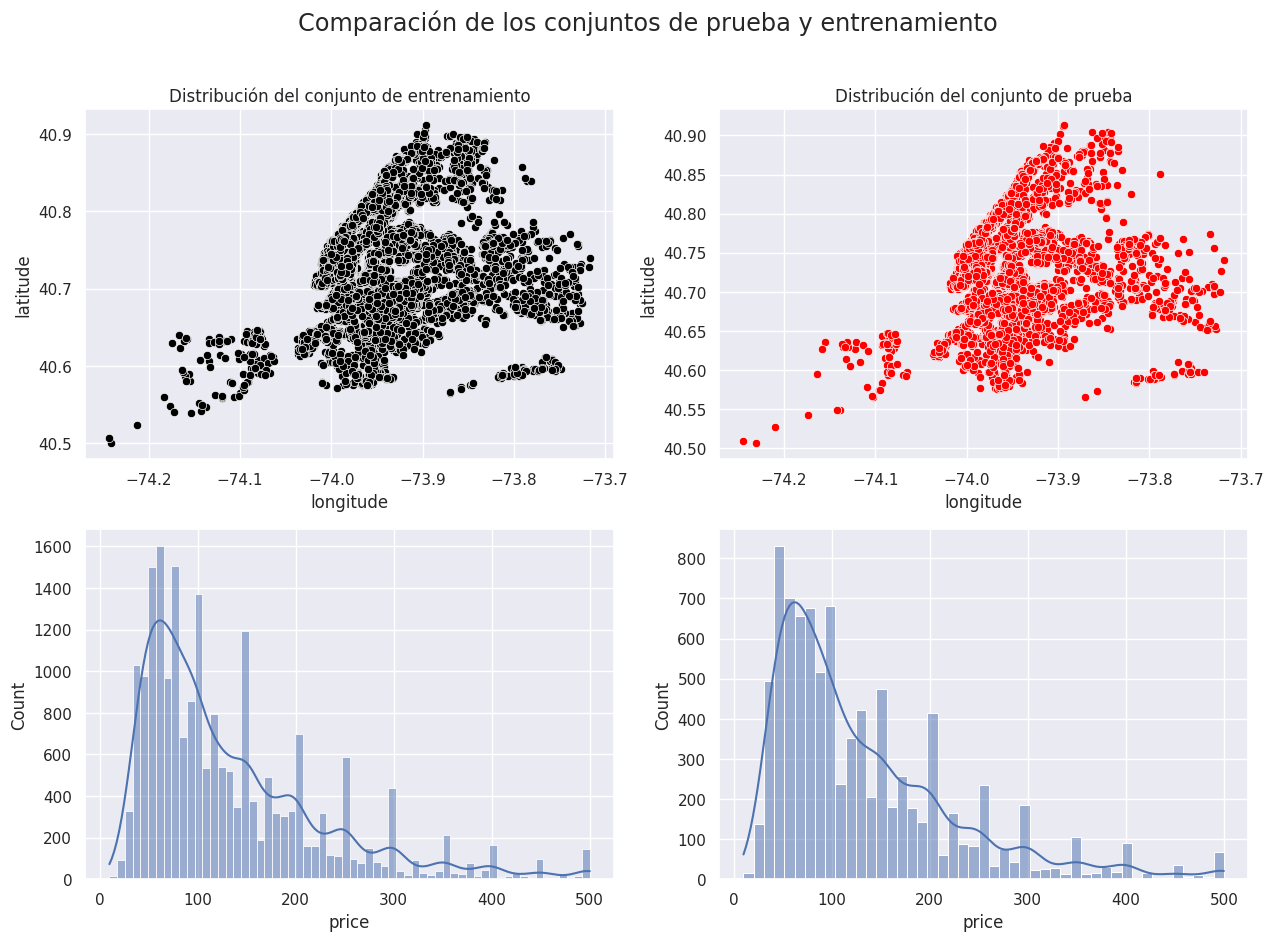

In [ ]:
# A continuación mostramos los resultados obtenidos en la celda anterior
fig, ax = plt.subplots(2,2, figsize = (15,10))

plt.suptitle("Comparación de los conjuntos de prueba y entrenamiento", size = "x-large")
ax[0,0].set_title("Distribución del conjunto de entrenamiento")
ax[0,1].set_title("Distribución del conjunto de prueba")

sns.scatterplot(data = X_train, x="longitude", y="latitude", color="black", ax=ax[0,0])
sns.scatterplot(data = X_test, x="longitude", y="latitude", color="red", ax=ax[0,1])

sns.histplot(x = y_train, kde = True, ax=ax[1,0])
sns.histplot(x = y_test, kde = True, ax=ax[1,1])
plt.show()


##**3)-Modelamiento por ML**

###3.1-Vecinos más cercanos - KNN

El algoritmo de K-vecinos más cercanos es un procedimiento de Machine Learning que opera según el problema a resolver sea de clasificación o regresion, con base a los K-vecinos mas próximos a un valor de data nuevo. En el caso de la clasificación, KNN clasifica nuevas instancias de la data deacuerdo a la clase mayoritaria presente dentro del conjunto de K vecinos más próximos dentro de la data de entrenamiento. Por otra parte, en problemas de regresión el valor predico para la nueva instancia de la data es simplemente el promedio efectuado entre los K vecinos más cercanos de la variable objetivo.

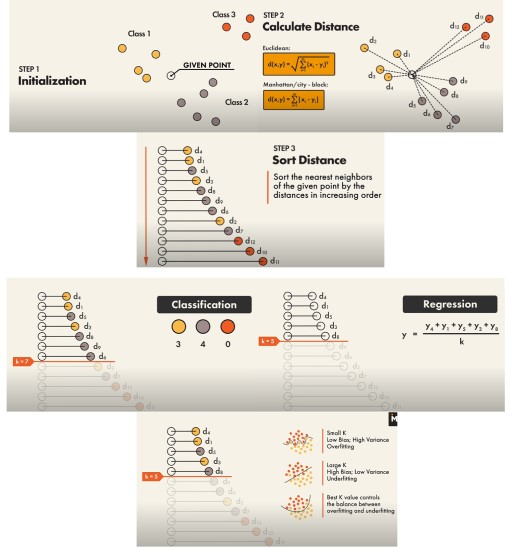

El algoritmo KNN es un algoritmo "perezoso" cuya fase de entrenamiento no consiste en la determinación de parámetros con base a la data de entrenamiento sino a simplemente un guardado de dicha data en memoria, así, la clasifiación/regresión simplemente se efectúa en la etapa de test. En escencia, es un algoritmo que no entrena propiamente sino que ofrece una predicción mediante la implementación de una métrica de distancia entre una data en memoria y una data nueva.

En general, el caso de underfiting es evidenciado para un K alto mientras que un K bajo es relacionado con un caso de overfitting. K=5 es considerado como un buen punto de partida que se encuentra optimamente entre el caso de sobre y sub ajuste.

Con esto en mente, éste algoritmo presenta ciertas ventajas y desventajas claras:

**Ventajas de KNN**

1.   Es de simple implementación.
2.   No hace ninguna suposición a cerca de que patrón rige la distribución de los datos.
3.   Fase de entrenamiento rápida.
4.   Funciona con múltiples métricas de distancia, la más empleada es la distancia Euclídea.
5.   Pocos hiperparámetros, solo es necesario definir el valor K de vecinos más cercanos.
6.   Fácil adaptación a nuevas muéstras de entrenamiento.

**Desventajas de KNN**

1.   No escala bien, dado que es un algoritmo perezoso, ocupa mucha memoria y almacenamiento en comparación con otro tipo de clasificadores/regresores.
2.   Es sensible a data de mala calidad y outliers, en especialpara K muy bajos.
3.   No funciona del todo bien con data de alta dimensionalidad.
4.   Es muy propenso al sobreajuste, sobretodo para valores de K muy bajos.
5.   No exíste un protocolo implícito para seleccionar un K correcto.
6.   No produce un modelo, limitando la capacidad de entender como las variables predictoras están relacionadas con la clase/valor a predecir.
7.   La fase de clasificación/regresión es lenta.


Algunas de las anteriores informaciones fuéron extraidas de las siguientes fuentes:

https://rstudio-pubs-static.s3.amazonaws.com/897840_583523fb516541c6adfa4bcb8b573f89.html#:~:text=DESVENTAJAS%20DEL%20ALGORITMO%20KNN,fase%20de%20clasificaci%C3%B3n%20es%20lenta.

https://www.ibm.com/mx-es/topics/knn

https://www.youtube.com/watch?v=0p0o5cmgLdE&ab_channel=IntuitiveMachineLearning

https://dokumen.tips/documents/knn-ventajas-y-desventajas-knn.html

Una vez aclarados ciertos aspectos a cerca del funcionamiento del algoritmo KNN, procedemos a crear nuestro modelo regresor.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Entrenamos nuestro objeto KN-regresor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

El anterior objeto, ha sido creado con unos valores por defecto de "n_neighbours = 5" siendo éste parámetro el número de vecinos K = 5 bajo una métrica de distancia Minkowsky "metric='minkowski'" establecida por defecto.

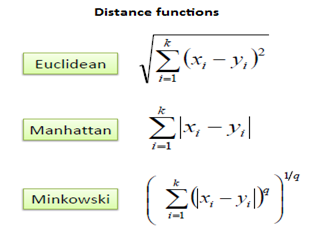

  Un regresor creado bajo la métrica Euclidea viene definido como:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Regresor K=5 con metrica Euclidea
knn_eu = KNeighborsRegressor(n_neighbors = 5, metric='euclidean')
knn_eu.fit(X_train,y_train)

# Regresor K=5 con metrica Cosenoidal
knn_cos = KNeighborsRegressor(n_neighbors = 5, metric='cosine')
knn_cos.fit(X_train,y_train)

KNeighborsRegressor(metric='cosine')

Este tipo de regresor, se pone a prueba mediante la evaluación de sus predicciónes bajo metricas como el error cuadrático medio (MSE) y el coeficiente de determinación ($R^2$).

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Generamos las predicciones del modelo
y_pred = knn.predict(X_test)

# Calculamos los MSE y R2 con base a y_test

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados del primer modelo knn" + "\n" + "--------"*4)
print("Coeficiente de determinación: {}".format(r2))
print("Error cuadrático medio: {}".format(mse))

Resultados del primer modelo knn
--------------------------------
Coeficiente de determinación: 0.5290335102596544
Error cuadrático medio: 4083.442615996464


A pesar de que el algoritmo KNN sirve como un regresor, no ofrece unos resultados muy precisos, como podémos observar presenta un alto MSE y un coeficiente de determinación bastante pequeño que no supera el 0.8. No obstante penalizar este modelo habiendo usado un único valor de K no es muy objetivo. Para tener una perspectiva más amplia, vamos a modificar la complejidad del modelo con el fin de optimizar la salida. Con éste objetivo variaremos el parámetro K, el número de vecinos, para posteriormente realizar experimentos de ajuste y determinar asi cual es el valor de éste hiperparámetro que minimiza el error de predicción dentro del conjunto de prueba para el valor de los precios de los hospedajes.

Acontinuación emplearemos una función que nos permite realizar las diferentes pruebas para K entre 1 y 80 donde solo seleccionaremos los valores impares de éste parámetro.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

def KNN_k_inspection_regression(x_data, y_data, t_size, n_tests=13):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=t_size, random_state=8)
    error_scores = {"Number_of_neighbors": [], "Train_mse": [],"Train_R2": [], "Test_mse": [], "Test_R2": []}

    for i in range(1, n_tests + 1, 2):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)

        y_predicted = knn.predict(X_test)
        y_predicted_train = knn.predict(X_train)

        mse_knn = mean_squared_error(y_test, y_predicted)
        mse_knn_train = mean_squared_error(y_train, y_predicted_train)
        r2_knn = r2_score(y_test, y_predicted)
        r2_knn_train = r2_score(y_train, y_predicted_train)

        error_scores["Number_of_neighbors"].append(i)
        error_scores["Train_mse"].append(mse_knn_train)
        error_scores["Train_R2"].append(r2_knn_train)
        error_scores["Test_mse"].append(mse_knn)
        error_scores["Test_R2"].append(r2_knn)

    return pd.DataFrame(error_scores)

In [ ]:
X = airbnb.drop(columns = ["price"])
y = airbnb["price"]

Knn_inspection = KNN_k_inspection_regression(X, y, t_size=0.3, n_tests=81)
Knn_inspection

,Number_of_neighbors,Train_mse,Train_R2,Test_mse,Test_R2
0,1,0.000000,1.000000,6459.016129,0.255045
1,3,2144.958782,0.752802,4481.577184,0.483114
2,5,2682.956722,0.690799,4083.442616,0.529034
3,7,2960.286333,0.658838,3965.943742,0.542585
4,9,3147.450234,0.637268,3938.904020,0.545704
5,11,3283.739677,0.621561,3928.011856,0.546960
6,13,3390.189761,0.609293,3938.329452,0.545770
7,15,3477.816006,0.599195,3958.190651,0.543480
8,17,3553.830547,0.590435,3981.326766,0.540811
9,19,3615.245936,0.583357,4003.258311,0.538282


Observando los anteriores resultados, podémos deducir que para K=1 exíste overfitting gracias a que el coeficiente de determinación para la data de entrenamiento es igual a 100%. Por otra parte, a medida que K aumenta el overfitting se descarta y se puede ver cómo el coeficiente de determinación progresivamente se reduce mientras que el MSE aumenta. Procedamos entonces a hacer una gráfica de éstas metricas.

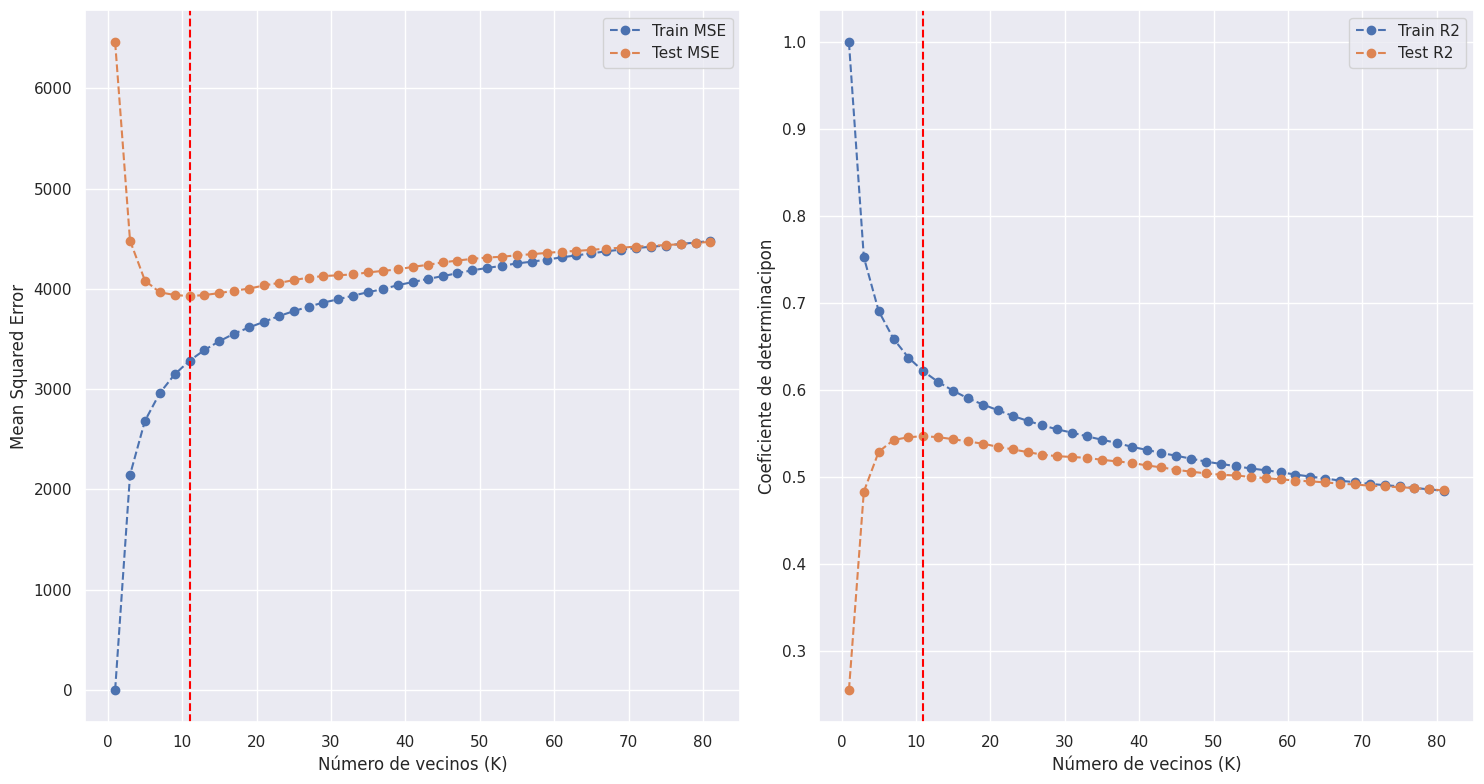

In [ ]:
data_mse_train = Knn_inspection["Train_mse"]
data_mse_test = Knn_inspection["Test_mse"]
data_r2_train = Knn_inspection["Train_R2"]
data_r2_test = Knn_inspection["Test_R2"]
ks = Knn_inspection["Number_of_neighbors"]


fig, ax = plt.subplots(1,2, figsize = (15,8))

# Graficamos el MSE del modelo
ax[0].plot(ks, data_mse_train, 'o', linestyle="dashed", label="Train MSE")
ax[0].plot(ks, data_mse_test, 'o', linestyle="dashed", label="Test MSE")
ax[0].set_xlabel("Número de vecinos (K)")
ax[0].set_ylabel("Mean Squared Error")
ax[0].legend()

# Graficamos el R2 del modelo
ax[1].plot(ks,data_r2_train, 'o', linestyle="dashed", label="Train R2")
ax[1].plot(ks,data_r2_test,'o',linestyle="dashed",label="Test R2")
ax[1].set_xlabel("Número de vecinos (K)")
ax[1].set_ylabel("Coeficiente de determinacipon")
ax[1].legend()

# Buscamos el indice en la data con el menor MSE
smallest_mse_index = data_mse_test.idxmin()
ax[0].axvline(x=ks[smallest_mse_index], color="red", linestyle='--')
# Buscamos el indice en la data con el mayor R2
highest_r2 = data_r2_test.idxmax()
ax[1].axvline(x=ks[highest_r2 ], color="red", linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
print("El valor de K con menor MSE es = {}".format((smallest_mse_index, min(data_mse_test))))
print("El valor de K con mayor R2 es = {}".format((highest_r2, max(data_r2_test))))

El valor de K con menor MSE es = (5, 3928.011856199078)
El valor de K con mayor R2 es = (5, 0.5469602172623893)


Vemos que en ésta ocación, el valor de K que mejor coeficiente de determinación y menor error cuadrático medio tiene corresponde a K=5.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def testers(y_pred, y_real):
  metric_func = [mean_squared_error, mean_absolute_error, r2_score]
  scores = {"sqrt_mse": [], "mse": [], "mean_abs_err": [], "R2": []}

  for func in metric_func:
    
    if func == mean_squared_error:
      mse = func(y_real, y_pred)
      scores["mse"].append(mse)
      scores["sqrt_mse"].append(np.sqrt(mse))
    elif func == mean_absolute_error:
      mae = func(y_real, y_pred)
      scores["mean_abs_err"].append(mae)
    elif func == r2_score:
      r2 = func(y_real, y_pred)
      scores["R2"].append(r2)

  return pd.DataFrame(scores)


In [ ]:
knn_final = KNeighborsRegressor(n_neighbors=5)
knn_final.fit(X_train, y_train)

y_predicted = knn_final.predict(X_test)
scores_df = testers(y_predicted, y_test)
scores_df

,sqrt_mse,mse,mean_abs_err,R2
0,63.90182,4083.442616,42.722581,0.529034


Deacuerdo al MSE, la raiz cuadrada del MSE y el valor absoluto de error medio, el performance del algoritmo es mejor en la medida que todos éstos puntajes de error sean más pequeños mientras que en el caso del Coeficiente de determinación ($R^2$), un mejor algoritmo de regresión describe un coeficiente cercano a uno. En nuéstro contexto, vemos que todos estos puntajes resultan ser relativamente altos y relativamente bajos para el caso del coeficiente de determinación, asi pues podemos concluir que el algoritmo de KNN NO es un método completamente optimo para este problema de regresión en particular.

###3.2-Arboles de Desición

Un árbol de decisión es un algorimo de aprendizaje supervisado no paramétrico útil tanto para tareas de clasificación como de regresión. Consiste en una colección de ramas, noto raíz, nodos internos y nodos hojas los cuales forman un grafo ramificado que organizan en forma de árbol jerárquico la información presente en un dataset. Un árbol de decisión comienza por un nodo raiz sin ramas entranes a partir del cual diferentes criterios de segmentación homogéneamente dividen la data en subconjuntos que se indican mediante nodos hojas o nodos terminales. Se denominan como nodos hojas  a todos los resultados posibles dentro de los con conjuntos de datos.

Un árbol de desición emplea una estrategia de división recursiva de arriba hacia abajo basada en la ganancia de información, es decir, basada en la minimización de impurezas de los nodos hojas lo cual se traduce en un proceso de optimizar la membresía de los datos a diferentes nodos hoja de manera tal que cada nodo hoja posea la menor cantidad de clases de información posible. Se recomienda al lector dirigirse a la siguiente referencia para entender como el algoritmo de árbol de decisión es formulado y cómo el principio de entropía y ganancia de información permiten la clasificación y regresión:

https://www.youtube.com/watch?v=_L39rN6gz7Y&ab_channel=StatQuestwithJoshStarmer

A continuación se enlistan unas de las ventajas y desventajas de los árboles de desición:

**Ventajas de los árboles de decisión**


1.   Poseen una fácil implementación para problemas simples y una interpretación concreta.
2.   Si el árbol no es demasiado grande, puede visualizarse.
3.   En un proceso de clasificaicón, las desiciones pueden visualizarse como cortes rectos dentro del dataset.
4.   No se requere una preparación demasiado exigente de los datos.
5.   Se puede trabajar tanto con variables cuantitativas como cualitativas.
6.   Es un algoritmo de caja blanca: la respuésta del algoritmo es fácilmente justificable a partir de lógica booleana.
7.   El costo de usar un árbol de desición es logarítmico con respecto al número de puntos de datos usados para entrenar el árbol.
8.   Puede manejar problemas de múltiples salidas.

**Desentajas de los árboles de decisión**


1.   Propensión al sobreajuste.
2.   Son estimadores de alta varianza, es decir, pequeñas variaciones dentro de los datos pueden producir un árbol de decisión muy diferente.
3.   Pueden ser algoritmos costosos de implementar si el problema a resolver es demasiado complejo.

A continuación se enlistan algunas de las referencias empleadas para encontrar las anteriores informaciones:

https://www.ibm.com/es-es/topics/decision-trees

https://interactivechaos.com/es/manual/tutorial-de-machine-learning/ventajas-y-desventajas

https://unipython.com/decision-trees-arboles-decision/

Con la anterior información en mente, como se vio en clase un modelo de desición regresor puede ser formulado de la siguietne manera:

In [95]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state= 5)
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=5)

In [94]:
# Obtenemos los hiperparámetros usados para entrenar el modelo
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 5,
 'splitter': 'best'}

La anterior sentencia de código genera una instancia de un arbol de desición regresor cuyo máximo de profundidad no está regulada, no posee un máximo numero de nodos hoja, no posee un máximo de caractarísticas a evaluar y se entrena a partir de un criterio de error cuadrático. Con el modelo prácticamente definido con su configuración default, se logra una profundidad máxima de 46 niveles.

In [99]:
tree.get_depth()

46

Una vez definido el modelo, procedemos a evaluar la efectividad de nuéstro modelo.

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state= 5)
tree.fit(X_train,y_train)

# Generamos las predicciones del modelo
y_pred_tree = tree.predict(X_test)

# Calculamos los MSE y R2 con base a y_test

mse = mean_squared_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

print("Resultados del primer modelo knn" + "\n" + "--------"*4)
print("Coeficiente de determinación: {}".format(r2))
print("Error cuadrático medio: {}".format(mse))

Resultados del primer modelo knn
--------------------------------
Coeficiente de determinación: 0.26343150372634005
Error cuadrático medio: 6386.304021210783


Sin embargo, el performance del árbol de decisión es mucho peor que el obtenido en el caso de vecinos más cercano. Así pues modifiquemos la complejidad dle modelo basado en árbol de decisión con el fin de optimizar lo más posible la salidad. La complejidad puede ser modificada cambiando el parámetro de profundidad maxima, la pureza de las hojas o el ccp_alpha. 

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


def DT_inspection_regression(x_data, y_data, t_size, n_tests=13):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=t_size, random_state=8)
    error_scores = {"Max_Depth": [], "Train_mse": [],"Train_R2": [], "Test_mse": [], "Test_R2": []}

    for i in range(1, n_tests + 1):
      tree =  DecisionTreeRegressor(random_state=8, max_depth = i)
      tree.fit(X_train, y_train)

      y_predicted = tree.predict(X_test)
      y_predicted_train = tree.predict(X_train)

      mse_tree = mean_squared_error(y_test, y_predicted)
      mse_tree_train = mean_squared_error(y_train, y_predicted_train)
      r2_tree = r2_score(y_test, y_predicted)
      r2_tree_train = r2_score(y_train, y_predicted_train)

      error_scores["Max_Depth"].append(i)
      error_scores["Train_mse"].append(mse_tree_train)
      error_scores["Train_R2"].append(r2_tree_train)
      error_scores["Test_mse"].append(mse_tree)
      error_scores["Test_R2"].append(r2_tree)

    return pd.DataFrame(error_scores)

In [107]:
X = airbnb.drop(columns = ["price"])
y = airbnb["price"]

DT_inspection = DT_inspection_regression(X, y, t_size=0.3, n_tests=41)
DT_inspection

,Max_Depth,Train_mse,Train_R2,Test_mse,Test_R2
0,1,5723.431701,0.340396,5620.326126,0.351776
1,2,4944.855741,0.430124,4904.681483,0.434315
2,3,4461.422581,0.485838,4465.421417,0.484978
3,4,4002.293254,0.538751,3994.813771,0.539256
4,5,3711.204203,0.572298,3745.856664,0.567969
5,6,3477.884826,0.599187,3598.727535,0.584938
6,7,3279.559202,0.622043,3602.305464,0.584526
7,8,3065.058214,0.646764,3698.338087,0.573450
8,9,2827.718543,0.674116,3736.450785,0.569054
9,10,2605.651587,0.699709,3881.895449,0.552279


A continuación, al igual que lo que hicimos con KNN, graficaremos los errores y los coeficientes de determinación para diferentes profundiaddes de árbol. Acto seguido, hallaremos el modelo más optimo para nuéstro dataset deacuerdo al valor de MSE y **R^2** más alto.

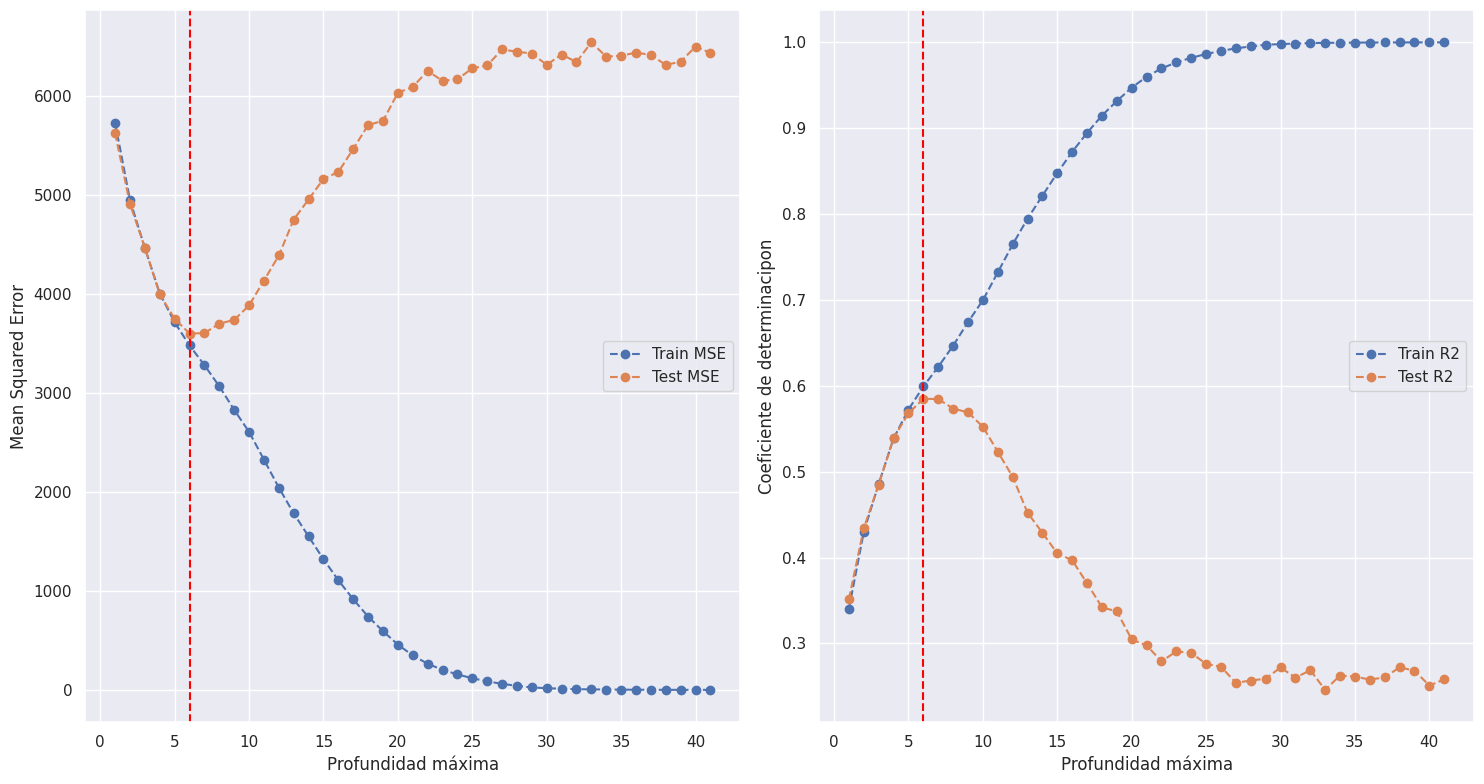

In [108]:
tree_data_mse_train = DT_inspection["Train_mse"]
tree_data_mse_test = DT_inspection["Test_mse"]
tree_data_r2_train = DT_inspection["Train_R2"]
tree_data_r2_test = DT_inspection["Test_R2"]
md = DT_inspection["Max_Depth"]


fig, ax = plt.subplots(1,2, figsize = (15,8))

# Graficamos el MSE del modelo
ax[0].plot(md, tree_data_mse_train, 'o', linestyle="dashed", label="Train MSE")
ax[0].plot(md, tree_data_mse_test, 'o', linestyle="dashed", label="Test MSE")
ax[0].set_xlabel("Profundidad máxima")
ax[0].set_ylabel("Mean Squared Error")
ax[0].legend()

# Graficamos el R2 del modelo
ax[1].plot(md,tree_data_r2_train, 'o', linestyle="dashed", label="Train R2")
ax[1].plot(md,tree_data_r2_test,'o',linestyle="dashed",label="Test R2")
ax[1].set_xlabel("Profundidad máxima")
ax[1].set_ylabel("Coeficiente de determinacipon")
ax[1].legend()

# Buscamos el indice en la data con el menor MSE
smallest_mse_index = tree_data_mse_test.idxmin()
ax[0].axvline(x=md[smallest_mse_index], color="red", linestyle='--')
# Buscamos el indice en la data con el mayor R2
highest_r2 = tree_data_r2_test.idxmax()
ax[1].axvline(x=md[highest_r2 ], color="red", linestyle='--')

plt.tight_layout()
plt.show()

In [109]:
print("El valor de depth con menor MSE es = {}".format((smallest_mse_index, min(tree_data_mse_test))))
print("El valor de depth con mayor R2 es = {}".format((highest_r2, max(tree_data_r2_test))))

El valor de depth con menor MSE es = (5, 3598.7275348638855)
El valor de depth con mayor R2 es = (5, 0.584938436997436)


In [110]:
tree_final = DecisionTreeRegressor(random_state=8, max_depth = 5)
tree_final.fit(X_train, y_train)

y_predicted = tree_final.predict(X_test)
scores_df = testers(y_predicted, y_test)
scores_df

,sqrt_mse,mse,mean_abs_err,R2
0,61.203404,3745.856664,41.379957,0.567969


De los anteriores resultados podemos evidencia efectivamente que a medida que la profundidad del árbol aumenta, el MSE obtenido para la data de entrenamiento se reduce monotónicamente mientras que el coeficiente de determinación se incrementa monotónicamente hasta el punto de llegar al sobreajuste reportando un coeficiente de determinación perfecto igual a uno después de una profundidad de 20.

Por otra parte, en el caso de la data de prubea, podémos ver que el punto de profundidad otima resulta ser un minimo de error MSE alcanzado para una profundidad de 5 despupés del cual el arror solo icrementa. De manera similar, el mejor puntaje para el coeficiente de determinación disminuye a partir de un máximo alcanzado para una profundidad igual a 5.

No obstante, a pesar de que éste valor de profundidad máxima igual a cinco es la mejor solucion de éste modelo de regresión, similarmente a lo ocurrido con KNN el máximo valor obtenido para el coeficiente de determinación es inferior a 0.6 mientras que los errores MSE, raiz de MSE y valor de error absoluto promedio, rodean respectivamente los 3700, 61 y 41 unidades, lo cual sigue siendo un error alto. 

Siendo los árboles de decisión se caracterizan por su alta interpretabilidad, asi pues podemos crear una lista con la importancia de las características del modelo optimo hallado anteriormente.

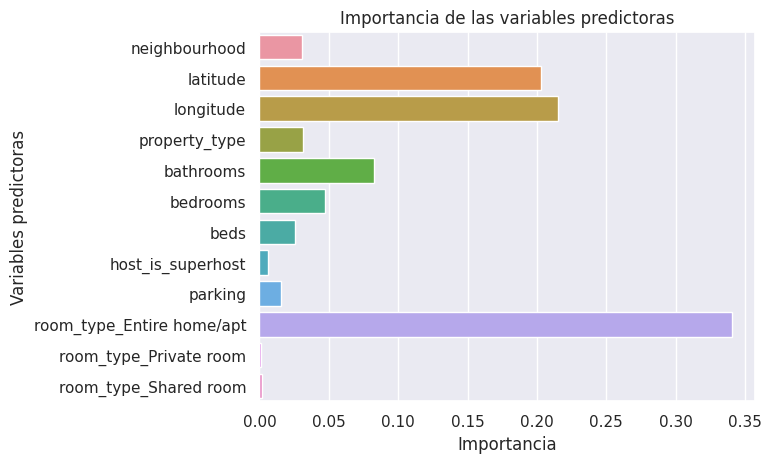

In [116]:
importances = tree.feature_importances_

sns.barplot(x = importances,y = list(X_train.columns))

plt.title('Importancia de las variables predictoras')
plt.xlabel('Importancia')
plt.ylabel('Variables predictoras')
plt.show()

Así pues, deacuerdo con los resultados anteriores, las variables más importantes para obtener el precio de un hospedaje deacuerdo a un árbol de decisión son: room type, longitude-latitude, number of bathrooms, number of bedrooms, neighbourhood y tipo de propiedad. 

##**4)-Conclusiones**

A partir de las prácticas efectuadas enteriormente se pueden recopilar lo siguientes resultados:

|Métrica|Vecinos más cercanos|Árbol de Decisión|
|---|---|---|
|Error cuadrático medio|4083.44|3745.85|
|Error absoluto medio|42.72|41.37|
|Coeficiente de determinación|0.529|0.567|

Los anteriores resultados nos ayudan a formar las siguientes conclusones:


1.   Dentro de los dos modelos usados en la fase de modelamiento, el modelo que menor error absoluto medio y menor error cuadrático medio obtuvo fue el árbol de decision, de manera similar, el árbol de decisión obtuvo el mayor coeficiente de determinación, por ende, el mejor modelo para nuestro problema de regresión es el árbol de decisión.
2.   Si bien el modelo más optimo a utilizar en nuestro caso de negocio es el árbol de decisión. No obstante a pesar de que los resultados de ambos modelos son superiores al 0.3 en términos del coeficiente de determinación, éstos dos modelos no son lo suficientemente robustos pero si complejos para obtener un resultado no superior al 0.8 de bonanza de ajuste en términos del coeficiente de determinación. Se recomienda entonces emplear un modelo más sencillo pero más potente que ofrezca un resultado más preciso.
3.  A pesar del bajo rendimiento de los modelos empleados, se encontró que la importancia de las variables deacuerdo al árbol de decisión van acorde al contexto de negocio y a los hallazgos obtenidos en la fase de exploración donde características como la localización del hospedaje, el tipo de hoispedaje, el número de baños y habitaciones son las características más relevantes en la definición del precio, por ende, este modelo ofrece un punto de perspectiva cuantitativo para la determación dle precio de hospejades.
4.  Se recomienda complementar la fase de limpieza y exploración usando los hallazgos aquí obtenidos, demanera tal de que variables poco importantes como room_type_Private y room_type_Shared sean eliminadas gracias a que reducir la dimensionalidad puede ayudar a incrementar el performance de los modelos. También se recomienda emplear otro tipo de algorimos más robustos como por ejemplo una red neuronal.



## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*